In [1]:
import sys
# Python 3.7 is required
assert sys.version_info >= (3, 7)

import cv2 as cv
import numpy as np
from util_func import show_img

np.random.seed(99)

# Make sure that optimization is enabled
if not cv.useOptimized():
    cv.setUseOptimized(True)
    
cv.useOptimized()

True

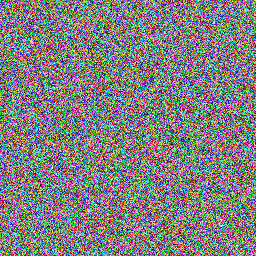

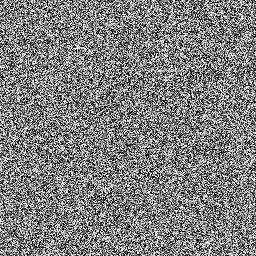

In [2]:
from PIL import Image
import random
import IPython.display as display

width, height = 256, 256
total_pixels = width * height

# Create a random noise color image
color_image = Image.new("RGB", (width, height))
color_pixels = [(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)) for _ in range(total_pixels)]
color_image.putdata(color_pixels)

# Create a corresponding grayscale image
grayscale_image = Image.new("L", (width, height))
grayscale_pixels = [random.randint(0, 255) for _ in range(total_pixels)]
grayscale_image.putdata(grayscale_pixels)

# Display the images
display.display(color_image)
display.display(grayscale_image)

# Save the images
color_image.save("random_noise_color_image.png")
grayscale_image.save("random_noise_grayscale_image.png")

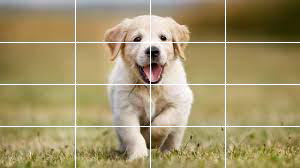

In [3]:
from PIL import Image, ImageDraw
import IPython.display as display

def crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color):
    # Get the width and height of the source image
    width, height = img.size

    # Calculate the width and height of each grid
    grid_width = width // num_horizontal_grid
    grid_height = height // num_vertical_grid

    # Create a new image to draw the grids on
    grid_image = img.copy()
    draw = ImageDraw.Draw(grid_image)

    # Draw vertical grid lines
    for i in range(1, num_horizontal_grid):
        x = i * grid_width
        draw.line([(x, 0), (x, height)], fill=line_color)

    # Draw horizontal grid lines
    for j in range(1, num_vertical_grid):
        y = j * grid_height
        draw.line([(0, y), (width, y)], fill=line_color)

    return grid_image

# Example usage:
input_image = Image.open("dog.jfif")  # Replace "path_to_your_image.jpg" with the actual path to your image
num_horizontal_grid = 4
num_vertical_grid = 4
line_color = (255, 255, 255)  # White color for grid lines

grid_image = crop_grid(input_image, num_horizontal_grid, num_vertical_grid, line_color)

# Display the image with grids directly under the code
display.display(grid_image)


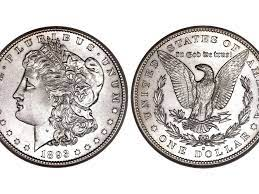

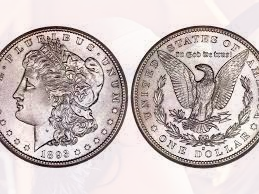

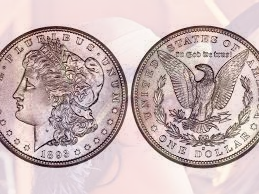

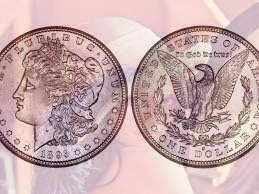

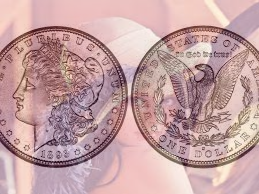

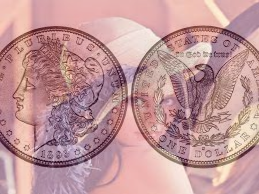

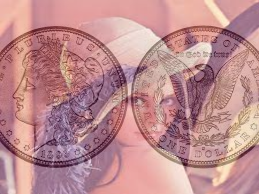

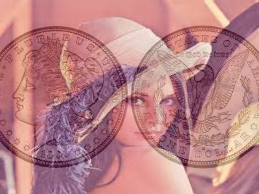

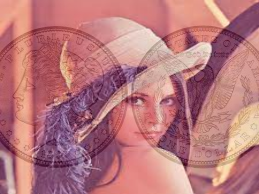

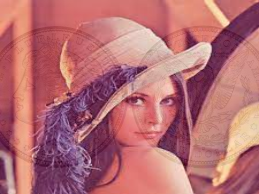

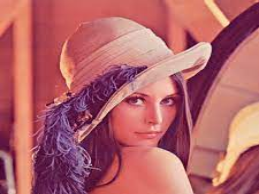

In [4]:
import cv2
import numpy as np
import IPython.display as display

def blend_images(image1, image2, alpha):
    return cv2.addWeighted(image1, alpha, image2, 1 - alpha, 0)

# Load the images
image1 = cv2.imread("lena.jfif")
image2 = cv2.imread("coins.jfif")

# Resize the images to have the same dimensions (optional)
image1 = cv2.resize(image1, (image2.shape[1], image2.shape[0]))

# Number of frames in the transition sequence
num_frames = 10

# Create and display the image sequences with smooth transition
for i in range(num_frames + 1):
    alpha = i / num_frames
    blended_image = blend_images(image1, image2, alpha)

    # Display the blended image
    display.display(display.Image(data=cv2.imencode('.png', blended_image)[1].tobytes(), format='png'))

    # Wait for a short time before displaying the next frame
    cv2.waitKey(100)

cv2.destroyAllWindows()


C:\Users\Jun\AppData\Local\Temp\ipykernel_5164\1018895609.py:18: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(watermark_text, font)


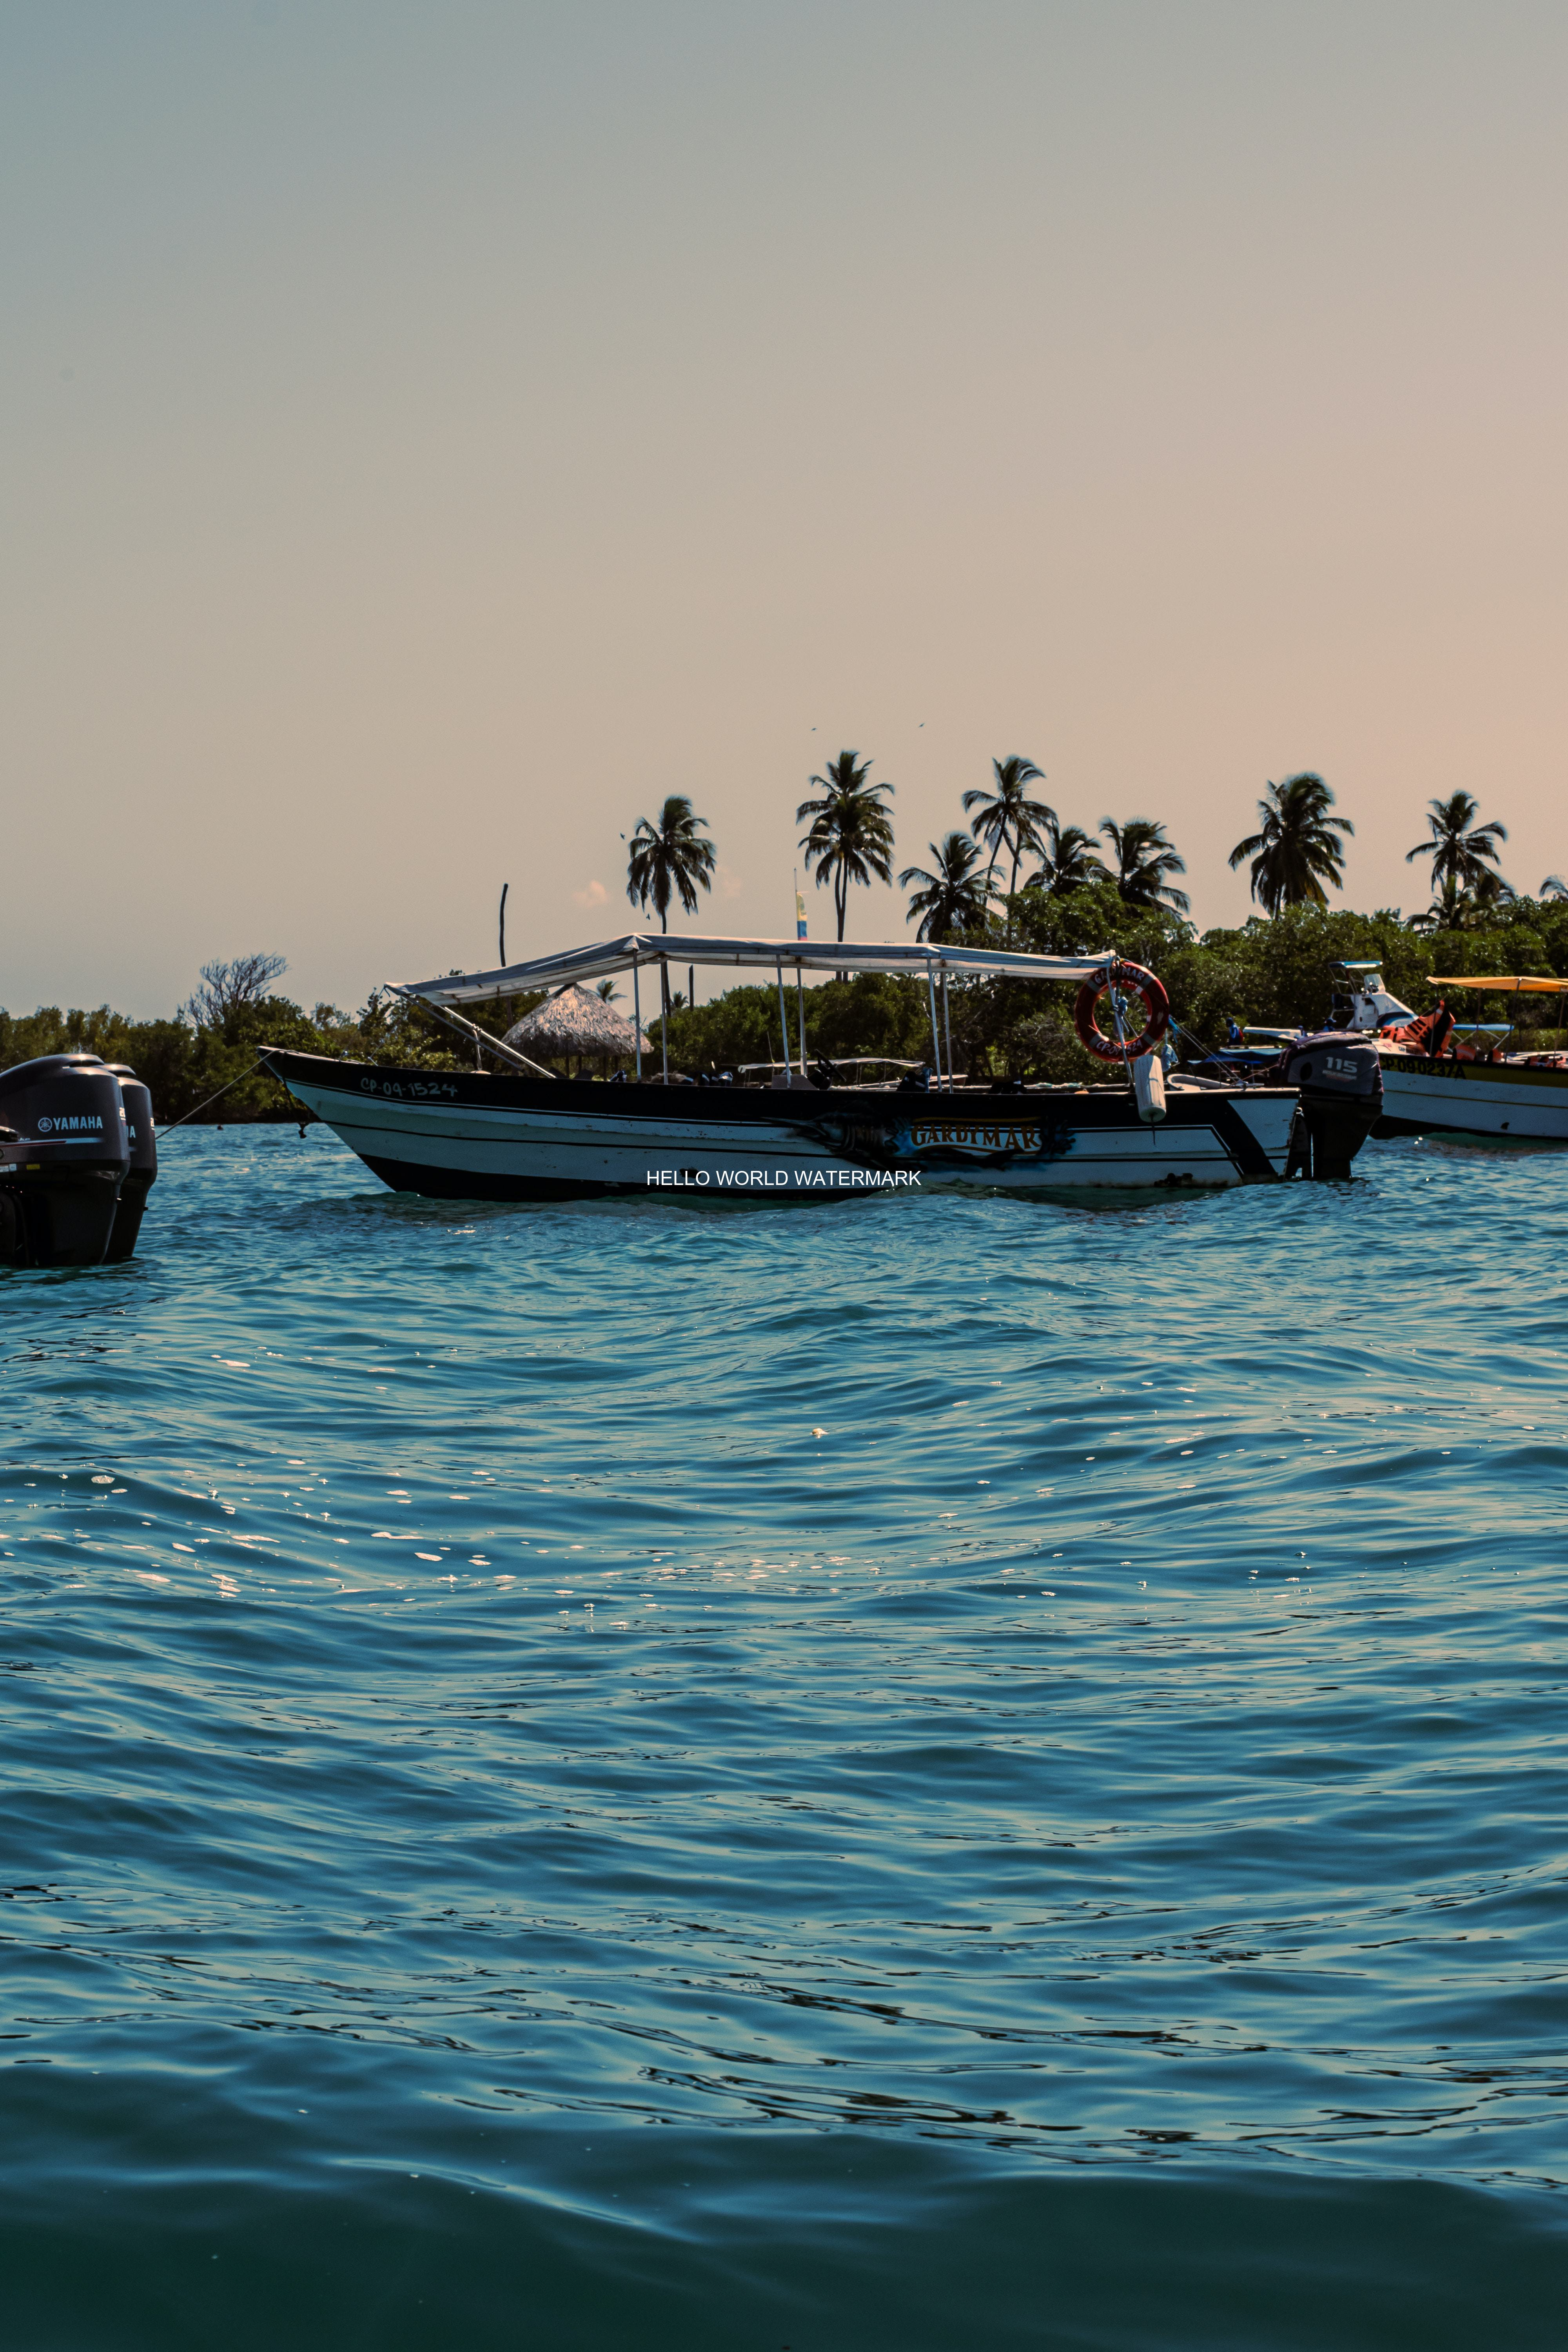

In [5]:
from PIL import Image, ImageDraw, ImageFont
import IPython.display as display

def apply_watermark(image_path, watermark_text, output_path):
    # Open the original image
    image = Image.open(image_path)

    # Create a drawing object
    draw = ImageDraw.Draw(image)

    # Get image dimensions
    image_width, image_height = image.size

    # Choose a font and size for the watermark
    font = ImageFont.truetype("arial.ttf", 50)

    # Calculate the size of the watermark text
    text_width, text_height = draw.textsize(watermark_text, font)

    # Calculate the position to center the watermark on the image
    x = (image_width - text_width) // 2
    y = (image_height - text_height) // 2

    # Set the color and transparency of the watermark
    text_color = (255, 255, 255)  # White color
    alpha = 100  # 0 (transparent) to 255 (opaque)

    # Add the watermark to the image
    draw.text((x, y), watermark_text, font=font, fill=(text_color[0], text_color[1], text_color[2], alpha))

    # Save the image with the watermark
    image.save(output_path)

    # Display the watermarked image
    display.display(display.Image(output_path))

# Example usage:
image_path = "travel_hd.jpg"
watermark_text = "HELLO WORLD WATERMARK"
output_path = "watermarked_image.jpg"

apply_watermark(image_path, watermark_text, output_path)
